#### Jueves 8 de mayo de 2025

## Árbol de Decisión CART. ¿Me gustará la película?

In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [46]:
#Dataset
data = {
    'Película': ['Inception', 'Titanic', 'Shrek'],
    'Género': ['Ciencia', 'Romance', 'Animación'],
    'DirectorFamoso': ['Sí', 'Sí', 'No'],
    'Duracion>2h': ['Sí', 'Sí', 'No'],
    'MeGustó': ['Sí', 'No', 'Sí']
}

df = pd.DataFrame(data)
print("Dataset original: ")
print(df)

Dataset original: 


,Película,Género,DirectorFamoso,Duracion>2h,MeGustó
0,Inception,Ciencia,Sí,Sí,Sí
1,Titanic,Romance,Sí,Sí,No
2,Shrek,Animación,No,No,Sí


In [47]:
# Cambiar datos categóricos a numéricos
label_encoders =  {}
df_encoded = df.copy()

for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le
print("\nDataset codificado:")
print(df_encoded)


Dataset codificado:


,Película,Género,DirectorFamoso,Duracion>2h,MeGustó
0,0,1,1,1,1
1,2,2,1,1,0
2,1,0,0,0,1


In [48]:
#Dividir datos de entrenamiento y prueba
X = df_encoded.drop(['Película', 'MeGustó'], axis=1)
y = df_encoded['MeGustó']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("\nDatos de entrenamiento: \n")
print(X_train)
print("\nDatos de prueba: \n")
print(X_test)


Datos de entrenamiento: 

   Género  DirectorFamoso  Duracion>2h
2       0               0            0

Datos de prueba: 

   Género  DirectorFamoso  Duracion>2h
0       1               1            1
1       2               1            1


In [49]:
# Creación y Entrenamiento del modelo
modelo = DecisionTreeClassifier(
    criterion = 'gini',
    random_state = 42
)
modelo.fit(X, y)

print("Profundidad real del árbol:", modelo.get_depth())
print("Número de hojas:", modelo.get_n_leaves())


Profundidad real del árbol: 1
Número de hojas: 2


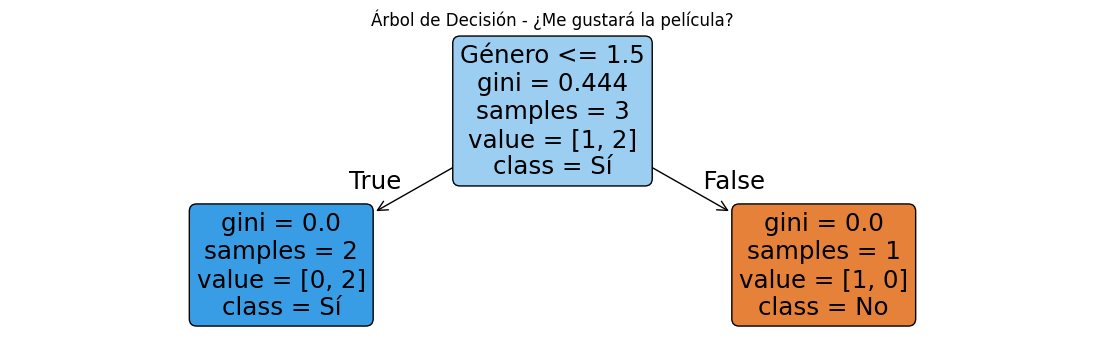

In [50]:
plt.figure(figsize=(14, 4))
plot_tree(
    modelo, 
    feature_names = X.columns,
    class_names=['No', 'Sí'], 
    filled=True,
    rounded=True,
    impurity=True
)
plt.title("Árbol de Decisión - ¿Me gustará la película?")
plt.show()

In [51]:
# Hacer predicciones

#Género: 0=Animación 1=Ciencia 2: Romance
#DirectorFamoso: 1:Sí 0:No
#Duracion>2h: 1:Sí 0:No

print("PREDICCIÓN - ¿ME GUSTARÁ LA PELÍCULA? \n")

# Ejemplo de predicción para Shrek
nuevos_datos = {
    'Género': 0,
    'DirectorFamoso': 0,
    'Duracion>2h': 0
}

nuevo_df = pd.DataFrame([nuevos_datos])
print("Datos de predicción: \n")
for atributo, valor in nuevos_datos.items():
    print(f"{atributo}: {valor}")

prediccion = modelo.predict(nuevo_df)

print("\nPredicción para el nuevo dato:")
if prediccion[0] == 1:
    print("Me gustará la película")
else:
    print("No me gustará la película")

PREDICCIÓN - ¿ME GUSTARÁ LA PELÍCULA? 

Datos de predicción: 

Género: 0
DirectorFamoso: 0
Duracion>2h: 0

Predicción para el nuevo dato:
Me gustará la película


In [53]:
# Importancia de cada atributo

# feature_importances_: muestra la importancia de cada característica en el modelo. 
# Cuanto mayor sea el valor, más relevante es esa característica para las decisiones del árbol de decisión.

importancias = modelo.feature_importances_ 

print("\nImportancia de cada atributo\n")
for atributo, importancia in zip(X.columns, importancias):
    print(f"{atributo} -> {importancia}")


Importancia de cada atributo

Género -> 1.0
DirectorFamoso -> 0.0
Duracion>2h -> 0.0


#### ¿Qué atributo tiene mayor importancia? ¿Cómo se divide el nodo para "Género = Animación"?

In [52]:
# El atributo con mayor importancia es Género

# Cuando el árbol llega al nodo "Género = Animación", ve que solo hay una película, Shrek*, y como te gustó,
# el nodo se convierte en una hoja con esa respuesta. No necesita hacer más divisiones 
# porque ya está claro que la respuesta es "Sí".